In [22]:
import pickle
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
proj_root = Path("..").resolve()
data_root = proj_root / "data"
model_root = data_root/"models"

In [9]:
for fn in model_root.glob("*.pickle"):
    print(fn.name)

20251017-1602-checkpoint-eval.pickle


In [10]:
with open(model_root/"20251017-1602-checkpoint-eval.pickle","rb") as fh:
    results = pickle.load(fh)
results_df = pd.DataFrame(results)
results_df.head()

,checkpoint,lam,tl,ta,evl,eva
0,20251017-1602-tiny-chkp-000128.msgpack.xz,1.000000,4.812227,0.093632,4.901051,0.074444
1,20251017-1602-tiny-chkp-000128.msgpack.xz,0.464159,4.604657,0.138566,4.690650,0.116111
2,20251017-1602-tiny-chkp-000128.msgpack.xz,0.215443,4.026389,0.215116,4.196138,0.171111
3,20251017-1602-tiny-chkp-000128.msgpack.xz,0.100000,3.456714,0.282641,3.726709,0.225000
4,20251017-1602-tiny-chkp-000128.msgpack.xz,0.046416,2.701068,0.416501,3.192358,0.313333


,checkpoint,lam,tl,ta,evl,eva,step
8,20251017-1602-tiny-chkp-000128.msgpack.xz,0.002154,0.958445,0.799169,2.412095,0.430000,128
20,20251017-1602-tiny-chkp-000256.msgpack.xz,0.002154,0.993368,0.792663,2.355058,0.441389,256
32,20251017-1602-tiny-chkp-000384.msgpack.xz,0.002154,1.014255,0.788317,2.369930,0.444167,384
44,20251017-1602-tiny-chkp-000512.msgpack.xz,0.002154,1.012925,0.788261,2.318327,0.445833,512
56,20251017-1602-tiny-chkp-000640.msgpack.xz,0.002154,1.024945,0.784579,2.280806,0.447778,640


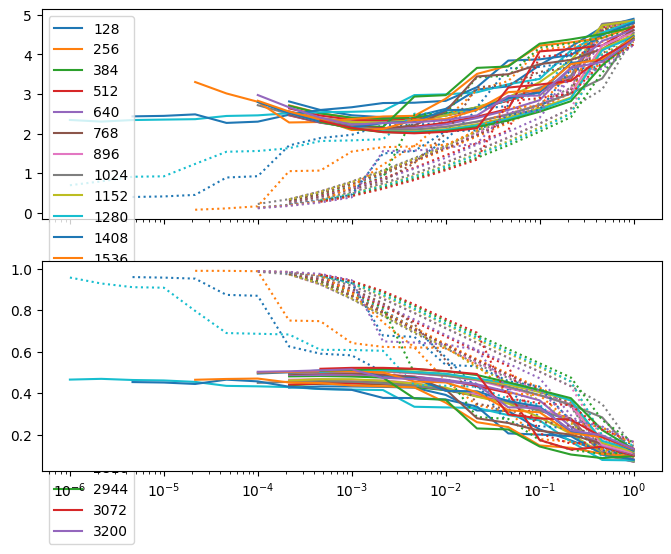

In [26]:
fig, axes = plt.subplots(2,1,figsize=(8,6),sharex=True)
best = []
for cp, grp in results_df.groupby("checkpoint"):
    grp = grp.sort_values("lam")
    step = int(cp.split(".")[0].split("-")[-1])
    grp.loc[:,"step"] = step
    c = None
    for sfx,ax in zip("la",axes):
        for pfx,ls in zip(["t","ev"],[":","-"]):
            l, = ax.semilogx(grp.lam,getattr(grp,pfx+sfx),ls=ls,c=c,label=str(step) if ls=="-" else None)
            c = l.get_color()
    ibest = np.argmin(grp.evl)
    best.append(grp.iloc[ibest])
axes[0].legend()
best = pd.DataFrame(best)
best.head()

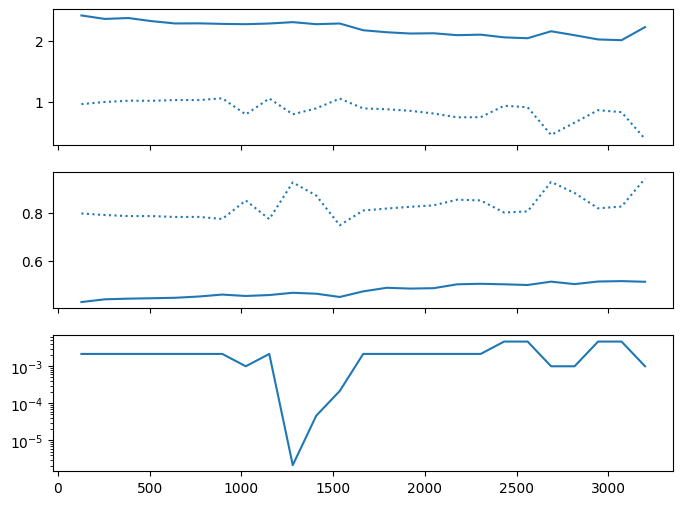

In [29]:
fig, axes = plt.subplots(3,1,figsize=(8,6),sharex=True)
c = None
for sfx,ax in zip("la",axes):
    for pfx,ls in zip(["t","ev"],[":","-"]):
        l, = ax.plot(best.step,getattr(best,pfx+sfx),ls=ls,c=c,label=str(step) if ls=="-" else None)
        c = l.get_color()
axes[-1].semilogy(best.step,best.lam)
